In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('data/Global_Superstore2.csv', encoding = "ISO-8859-1")
df_unchanged=pd.read_csv('data/Global_Superstore2.csv', encoding = "ISO-8859-1")

# Entfernen aller Attribute, die bei vorangegangener Exploration (wegen fehlender statistischer Abhängigkeit mit Profit) entfernt wurden

In [44]:
del df["State"],df_unchanged["State"]

In [45]:
del df["City"],df_unchanged["City"]

In [46]:
del df["Postal Code"],df_unchanged["Postal Code"]

In [47]:
del df["Product ID"],df_unchanged["Product ID"]

In [48]:
del df["Product Name"],df_unchanged["Product Name"]

In [49]:
del df["Order Priority"],df_unchanged["Order Priority"]

In [50]:
del df["Order ID"],df_unchanged["Order ID"]

In [51]:
del df["Ship Date"],df_unchanged["Ship Date"]

In [52]:
del df["Order Date"],df_unchanged["Order Date"]

In [53]:
del df["Ship Mode"],df_unchanged["Ship Mode"]

In [54]:
del df["Customer ID"],df_unchanged["Customer ID"]

In [55]:
del df["Customer Name"],df_unchanged["Customer Name"]

In [56]:
del df["Segment"],df_unchanged["Segment"]

# Bereinigtes DataFrame:

In [57]:
df

,Row ID,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57
1,26341,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63
2,25330,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49
3,13524,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16
4,47221,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04
...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.01
51286,35398,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,0.01
51287,40470,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.01
51288,9596,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,0.00


# Mit diesem DataFrame kann jetzt der Algorithmus/das Modell aufgesetzt werden, um den Profit vorherzusagen

# 1. Umwandeln der kategorischen Variablen in numerische

Diese Umwandlung ist nötig, da das Machine Learning Modell keine Zusammenhänge zwischen Text-Variablen finden kann. Durch die folgenden Methoden wird jeder kategorischen Ausprägung ein numerischer Wert zugeordnet.

In [58]:
df['Category'] =df['Category'].astype('category').cat.codes
df['Sub-Category'] =df['Sub-Category'].astype('category').cat.codes
df['Country'] =df['Country'].astype('category').cat.codes
df['Market'] =df['Market'].astype('category').cat.codes
df['Region'] =df['Region'].astype('category').cat.codes

In [59]:
df

,Row ID,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost
0,32298,139,6,6,2,0,2309.650,7,0.0,762.1845,933.57
1,26341,6,0,9,0,5,3709.395,9,0.1,-288.7650,923.63
2,25330,6,0,9,2,13,5175.171,9,0.1,919.9710,915.49
3,13524,47,4,3,2,13,2892.510,5,0.1,-96.5400,910.16
4,47221,110,1,0,2,6,2832.960,8,0.0,311.5200,903.04
...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,65,0,8,1,8,65.100,5,0.0,4.5000,0.01
51286,35398,139,6,3,1,1,0.444,1,0.8,-1.1100,0.01
51287,40470,139,6,12,1,7,22.920,3,0.0,11.2308,0.01
51288,9596,17,5,10,1,3,13.440,2,0.0,2.4000,0.00


Beim Vergleich mit dem ursprünglichen DataFrame fällt also auf, dass z.B. bei country dem Land Australien die Zahl 6 und dem Land Deutschland die Zahl 47 zugeordnet wurde.

# 2. Aufteilen des Datensatzes in Trainings- und Testdaten

In [60]:
X = np.asarray(df[['Country','Market','Region','Category','Sub-Category','Sales','Quantity','Discount','Shipping Cost']]) 
Y = np.asarray(df['Profit'])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle= True)

Die tran_test_split library von sklearn setzt das korrekte Splitting gemäß der Machine Learning Grundsätze bereits um (z.B. geeignetes Verhältnis zwischen Trainings- und Testdaten, Kreuzvalidierung (X-Val), ...)

# 3. Lineare Regression

Score:  0.285111740938511
Weights:  [ 9.75987675e-02 -6.79381958e-01 -2.36053563e-01  9.00724386e+00
 -1.75010279e+00  1.78818003e-01 -3.34287985e+00 -2.29097021e+02
 -9.36930994e-02]


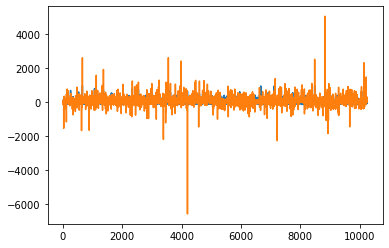

In [61]:
lineReg = LinearRegression()
lineReg.fit(X_train, y_train)
print('Score: ', lineReg.score(X_test, y_test))
print('Weights: ', lineReg.coef_)

plt.plot(lineReg.predict(X_test))
plt.plot(y_test,)
plt.show()

Der Score spiegelt hier die Genauigkeit des Modells wider. Je höher der Score, desto besser das Modell.

Die Weights sind Gewichte, die den einzelnen Attributen zugeordnet werden, um den Profit vorherzusagen.

# 4. Ridge Regression

Score:  0.2851107659420663
Weights:  [ 9.75163222e-02 -6.78488133e-01 -2.36060740e-01  9.00804676e+00
 -1.75012557e+00  1.78819909e-01 -3.34300358e+00 -2.29024277e+02
 -9.36847813e-02]


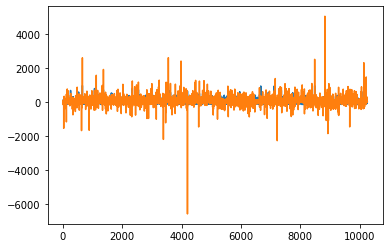

In [62]:
reg = linear_model.Ridge (alpha = .55)
reg.fit(X_train, y_train)
print('Score: ', reg.score(X_test, y_test))
print('Weights: ', reg.coef_)

plt.plot(reg.predict(X_test))
plt.plot(y_test)
plt.show()

# 5. Vergleich: Welches Regressionsmodell passt besser?

### Die folgenden Methoden durchlaufen das Modell für eine übergebene Anzahl von Iterationen. Grundsätzlich gilt, dass eine höhere Zahl Iterationen für eine höhere Aussagekraft des Ergebnisses spricht. Es wird also verglichen wie sich die Scores der beiden Modelle bei verschiedenen Anzahlen von Iterationen verhalten, um zu beurteilen welches Modell besser performt.

In [63]:
def ScoreLinearRegression(pAnzahl):
    scores = []
    coefs = []
    for i in range(pAnzahl):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle= True)
        lineReg = LinearRegression()
        lineReg.fit(X_train, y_train)
        scores.append(lineReg.score(X_test, y_test))
        coefs.append(lineReg.coef_)
    print('Linear Regression')
    print(np.mean(scores))
    print(np.mean(coefs, axis=0))

In [64]:
def ScoreRidgeRegression(pAnzahl):
    scores = []
    coefs = []
    for i in range(pAnzahl):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle= True)
        lineReg = linear_model.Ridge (alpha = .55)
        lineReg.fit(X_train, y_train)
        scores.append(lineReg.score(X_test, y_test))
        coefs.append(lineReg.coef_)
    print('\nRidge Regression')
    print(np.mean(scores))
    print(np.mean(coefs, axis=0))

### Dass bei jedem Durchlauf der Datensatz neu "geshuffelt" wird und davon dann zufällige 20% als Testdaten genutzt werden, ist bei jeder Iteration die Aufteilung anders. Dies entspricht den Kriterien der Kreuzvalidierung und sorgt somit für valide Ergebnisse.

In [65]:
ScoreLinearRegression(50)
ScoreRidgeRegression(50)

Linear Regression
0.31351977115824076
[ 9.62680903e-02 -5.18547620e-01 -1.66981826e-01  1.00533668e+01
 -1.70204605e+00  1.81090347e-01 -3.55344448e+00 -2.29934252e+02
 -1.37444936e-01]

Ridge Regression
0.29477039286070505
[ 9.86004724e-02 -4.91344459e-01 -1.79858040e-01  1.00986354e+01
 -1.71819788e+00  1.85668790e-01 -3.67016459e+00 -2.29366512e+02
 -1.57310611e-01]


In [66]:
ScoreLinearRegression(100)
ScoreRidgeRegression(100)

Linear Regression
0.29040928944247246
[ 9.80252675e-02 -4.60125462e-01 -1.62445227e-01  1.00899050e+01
 -1.71664899e+00  1.89413935e-01 -3.76454103e+00 -2.29692544e+02
 -1.87886998e-01]

Ridge Regression
0.31610156657158617
[ 9.78096286e-02 -5.28473027e-01 -1.57423652e-01  1.00314353e+01
 -1.71470195e+00  1.82203090e-01 -3.61699421e+00 -2.30307557e+02
 -1.42431284e-01]


In [67]:
# ScoreLinearRegression(500)
# ScoreRidgeRegression(500)

In [68]:
# ScoreLinearRegression(1000)
# ScoreRidgeRegression(1000)

In [69]:
# ScoreLinearRegression(2000)
# ScoreRidgeRegression(2000)

### Beide Modelle sind sehr ähnlich, aufgrund ihres gleichen Ansatzes. Dennoch zeigt sich bei einer gr0ßen Anzahl von Iterationen, dass die Ridge Regression etwas besser ist. Daher nutzen wir im Folgenden die Ridge Regression als finales Modell.

# 6. Tabellen aufstellen, um gewünschte Inputs übergeben zu können

In [70]:
def tabelleErzeugen(pColumn):
    g = df_unchanged.groupby(pColumn)
    array1=list(g.groups.keys())
    g = df.groupby(pColumn)
    array2=list(g.groups.keys())
    Kategorien = pd.DataFrame(list(zip(array1, array2)),columns =['Name', 'Zahl'])
    return Kategorien

In [71]:
def getCountryNumber(pCountry):
    a=tabelleErzeugen("Country")
    return a.loc[a['Name'] == pCountry]

Diese Methode gibt das DataFrame zurück, in dem zu sehen ist, welche Zahl für welche Ausprägung der jeweiligen kategorischen Variable steht.

In [72]:
tabelleErzeugen("Country")

,Name,Zahl
0,Afghanistan,0
1,Albania,1
2,Algeria,2
3,Angola,3
4,Argentina,4
...,...,...
142,Venezuela,142
143,Vietnam,143
144,Yemen,144
145,Zambia,145


Hier sind nicht alle Werte sichtbar. Durch den Folgenden Aufruf kann die Zahl spezifischer Länder abgefragt werden: getCountryNumber(pLand) Beispiel:

In [73]:
getCountryNumber("Germany")

,Name,Zahl
47,Germany,47


In [74]:
tabelleErzeugen("Market")

,Name,Zahl
0,APAC,0
1,Africa,1
2,Canada,2
3,EMEA,3
4,EU,4
5,LATAM,5
6,US,6


In [75]:
tabelleErzeugen("Region")

,Name,Zahl
0,Africa,0
1,Canada,1
2,Caribbean,2
3,Central,3
4,Central Asia,4
5,EMEA,5
6,East,6
7,North,7
8,North Asia,8
9,Oceania,9


In [76]:
tabelleErzeugen("Category")

,Name,Zahl
0,Furniture,0
1,Office Supplies,1
2,Technology,2


In [77]:
tabelleErzeugen("Sub-Category")

,Name,Zahl
0,Accessories,0
1,Appliances,1
2,Art,2
3,Binders,3
4,Bookcases,4
5,Chairs,5
6,Copiers,6
7,Envelopes,7
8,Fasteners,8
9,Furnishings,9


# 7. Mit dem Modell den Profit vorhersagen

## Jetzt kann das Modell dazu genutzt werden anhand verschiedener Parameter den Profit der anstehenden Transaktion vorherzusagen.

Es muss einfach der Befehl **reg.predict([['Country','Market','Region','Category','Sub-Category','Sales','Quantity','Discount','Shipping Cost']])** ausgeführt werden. Die kategorischen Variablen werden durch die im 6. Schritt ermittelten Ersatzzahlen eingegeben und für die numerischen Werte werden einfach die tatsächlichen Zahlen übergeben.

# Es folgt ein Anwendungsbeispiel

### 7.1 Ein Unternehmen möchte ein Handy verkaufen. Es soll nur einzeln und nicht in Menegangeboten verpackt werden. Es soll maximal Rabatte von 10 % geben. Jetzt ist die Frage was der beste Absatzmarkt ist. Unser Modell wird genutzt, um zu prüfen für welche geografischen Parameter der Profit am größten ist. Die Shipping Costs sind abhängig vom Markt, weil das Unternehmen seinen Sitz in den USA hat. Es werden also zwischen den Varianten die Attribute Country, Region, Market und Shipping Cost verändert.

#### 1. Variante: 

Country: 139 (United States), Market: 6 (US), Region: 7 (North), Category: 2 (Technology), Sub-Category: 13 (Phones), Quantity: 1, Discount: 0.1, Shipping Cost: 700

In [78]:
getCountryNumber("United States")

,Name,Zahl
139,United States,139


In [79]:
reg.predict([[139, 6, 7, 2, 13, 1000, 1, 0.1, 400]])

array([149.83844811])

#### 2. Variante: 

Country: 139 (United States), Market: 6 (US), Region: 6 (East), Category: 2 (Technology), Sub-Category: 13 (Phones), Quantity: 1, Discount: 0.1, Shipping Cost: 700

In [80]:
reg.predict([[139, 6, 6, 2, 13, 1000, 1, 0.1, 400]])

array([150.07450885])

#### 3. Variante:

Country: 139 (United States), Market: 6 (US), Region: 12 (West), Category: 2 (Technology), Sub-Category: 13 (Phones), Quantity: 1, Discount: 0.1, Shipping Cost: 700

In [81]:
reg.predict([[139, 6, 12, 2, 13, 1000, 1, 0.1, 400]])

array([148.65814441])

#### Die Region innerhalb der USA macht also keinen Unterschied. Daher werden jetzt Absatzmärkte auf einem anderen Kontinent ausprobiert

#### 4. Variante:

Country: 17 (Brazil), Market: 5 (LATAM), Region: 10 (South), Category: 2 (Technology), Sub-Category: 13 (Phones), Quantity: 1, Discount: 0.1, Shipping Cost: 700

In [82]:
getCountryNumber("Brazil")

,Name,Zahl
17,Brazil,17


In [83]:
reg.predict([[17, 5, 10, 2, 13, 1000, 1, 0.1, 700]])

array([109.80632833])

In [84]:
df_unchanged.loc[df_unchanged['Region'] == "Central Asia"]

,Row ID,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost
11,28879,Afghanistan,APAC,Central Asia,Furniture,Tables,4626.15,5,0.0,647.55,835.57
29,22999,India,APAC,Central Asia,Furniture,Chairs,1878.72,4,0.0,582.36,704.08
41,29272,India,APAC,Central Asia,Technology,Phones,4518.78,7,0.0,632.52,658.69
42,25795,India,APAC,Central Asia,Furniture,Bookcases,5667.87,13,0.0,2097.03,658.35
48,28701,India,APAC,Central Asia,Technology,Machines,2174.13,7,0.0,500.01,637.86
...,...,...,...,...,...,...,...,...,...,...,...
51103,20407,India,APAC,Central Asia,Office Supplies,Labels,6.27,1,0.0,2.94,0.11
51163,25350,India,APAC,Central Asia,Office Supplies,Art,58.44,2,0.0,19.26,0.09
51235,24004,Pakistan,APAC,Central Asia,Office Supplies,Labels,17.28,4,0.5,-13.92,0.05
51253,29192,Pakistan,APAC,Central Asia,Office Supplies,Paper,18.36,2,0.5,-13.26,0.04


#### 5. Variante:

Country: 47 (Germany), Market: 4 (EU), Region: 3 (Central), Category: 2 (Technology), Sub-Category: 13 (Phones), Quantity: 1, Discount: 0.1, Shipping Cost: 650

In [85]:
reg.predict([[47, 4, 3, 2, 13, 1000, 1, 0.1, 650]])

array([119.74697037])

#### 6. Variante:

Country: 110 (Senegal), Market: 1 (Africa), Region: 0 (Africa), Category: 2 (Technology), Sub-Category: 13 (Phones), Quantity: 1, Discount: 0.1, Shipping Cost: 1200

In [86]:
getCountryNumber("Senegal")

,Name,Zahl
110,Senegal,110


In [87]:
reg.predict([[110, 1, 0, 2, 13, 1000, 1, 0.1, 1200]])

array([77.10751558])

#### 7. Variante: 

Country: 26 (China), Market: 0 (APAC), Region: 8 (North Asia), Category: 2 (Technology), Sub-Category: 13 (Phones), Quantity: 1, Discount: 0.1, Shipping Cost: 950

In [88]:
getCountryNumber("China")

,Name,Zahl
26,China,26


In [89]:
reg.predict([[26, 0, 8, 2, 13, 1000, 1, 0.1, 950]])

array([91.12734206])

### Fazit des Beispiels

**Der beste Absatzmarkt für das Handy des Unternehmens scheint die USA selbst zu sein.** Aufgrund der erhöhten Shipping Costs bei Verkauf in anderen Kontinenten, ist **der vorhergesagte Profit in den USA mit Abtsand am höchsten.** Welcher konkrete Markt innerhalb der USA genutzt wird, spielt keine Rolle. Das Handy würde in allen gleich gut laufen.